In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from extra_keras_datasets import emnist
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

np.random.seed(42)
tf.random.set_seed(42)

In [4]:
use_emnist = False
if use_emnist:
    (x_train, y_train), (x_test, y_test) = emnist.load_data(type='balanced')
    dataset_name = "EMNIST"
else:
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    dataset_name = "MNIST"

print(f"Dataset: {dataset_name}")
print("Train:", x_train.shape, " Test:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Dataset: MNIST
Train: (60000, 28, 28)  Test: (10000, 28, 28)


In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

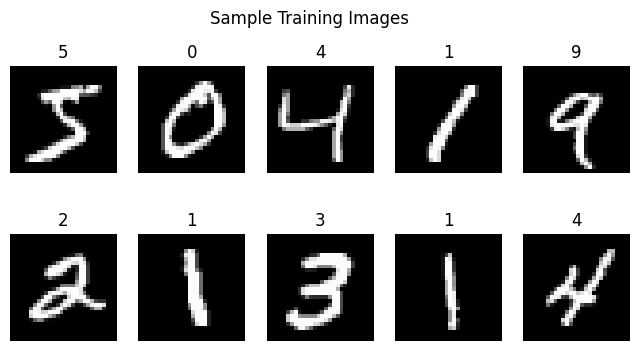

In [6]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")
    plt.title(np.argmax(y_train[i]))
    plt.axis("off")
plt.suptitle("Sample Training Images")
plt.show()

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
422/422 - 10s - 24ms/step - accuracy: 0.9052 - loss: 0.3174 - val_accuracy: 0.9835 - val_loss: 0.0580
Epoch 2/10
422/422 - 3s - 8ms/step - accuracy: 0.9695 - loss: 0.1029 - val_accuracy: 0.9872 - val_loss: 0.0439
Epoch 3/10
422/422 - 3s - 6ms/step - accuracy: 0.9779 - loss: 0.0756 - val_accuracy: 0.9887 - val_loss: 0.0382
Epoch 4/10
422/422 - 2s - 4ms/step - accuracy: 0.9811 - loss: 0.0619 - val_accuracy: 0.9895 - val_loss: 0.0352
Epoch 5/10
422/422 - 2s - 4ms/step - accuracy: 0.9832 - loss: 0.0542 - val_accuracy: 0.9905 - val_loss: 0.0332
Epoch 6/10
422/422 - 3s - 6ms/step - accuracy: 0.9864 - loss: 0.0452 - val_accuracy: 0.9907 - val_loss: 0.0330
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9876 - loss: 0.0396 - val_accuracy: 0.9925 - val_loss: 0.0291
Epoch 8/10
422/422 - 3s - 7ms/step - accuracy: 0.9887 - loss: 0.0363 - val_accuracy: 0.9923 - val_loss: 0.0303
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9901 - loss: 0.0322 - val_accuracy: 0.9910 - val_loss: 0.0326

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"{dataset_name} Test Accuracy: {test_acc:.4f}")

MNIST Test Accuracy: 0.9927


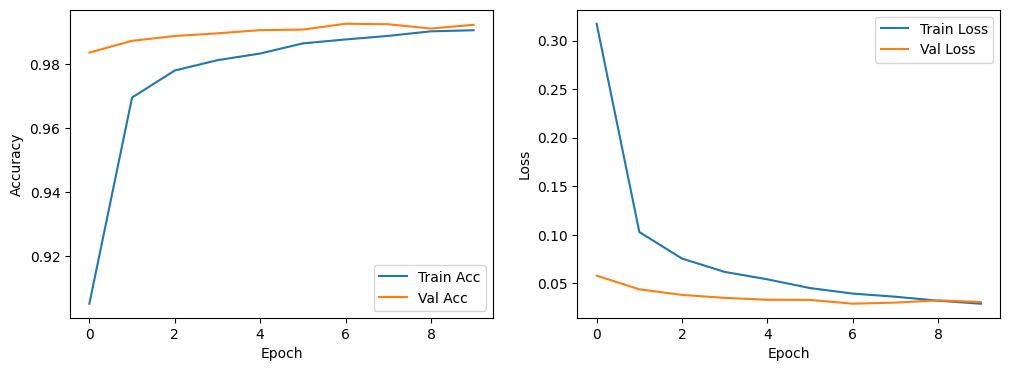

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


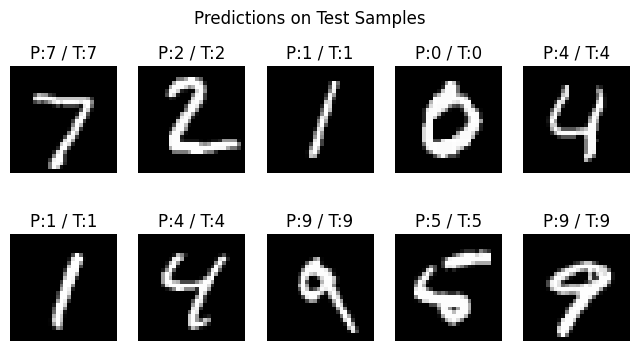

In [13]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"P:{y_pred_classes[i]} / T:{y_true[i]}")
    plt.axis("off")
plt.suptitle("Predictions on Test Samples")
plt.show()

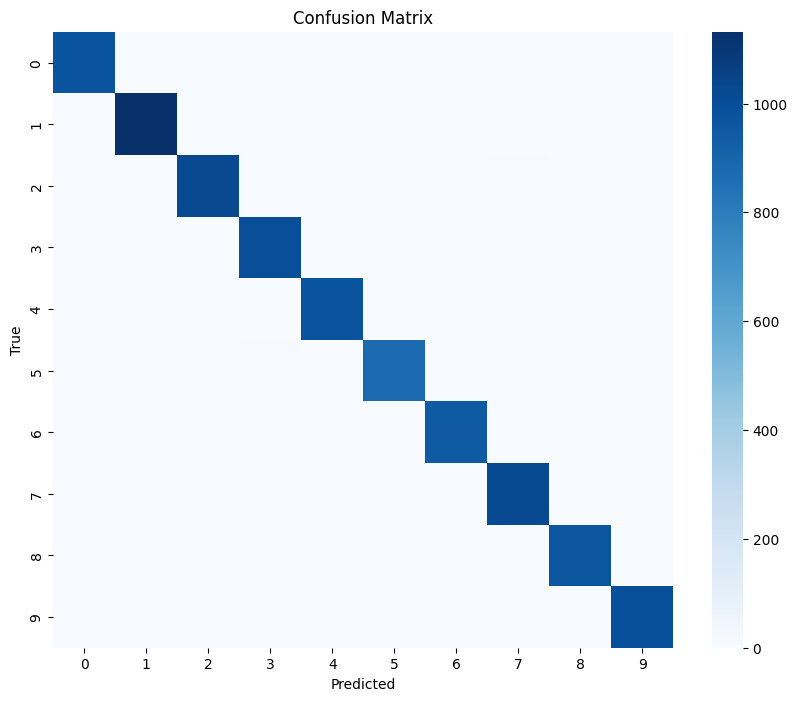

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [14]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_true, y_pred_classes))